# RevoU Data Analytics Task

## Case Study - Business Understanding

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers. 

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

#### Content

**Attributes**

**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumWebPurchases: Number of purchases made through the company’s web site
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s web site in the last month

In [673]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score 
warnings.filterwarnings('ignore')

In [674]:
# PRINT THE COMPLETE INFORMATION OF THE DATASET

df = pd.read_csv('Customer analysis.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [675]:
# DO THE BASIC STATISTICS ON CONTINOUS FEATURES

df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [676]:
# Check the missing value

df.isnull().sum().sort_values(ascending = False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [677]:
# FILL THE MISSING VALUES WITH THE MEDIAN VALUES

df['Income']=df['Income'].fillna(df['Income'].median())

In [678]:
# Check if there is a duplicate
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [679]:
# see the number of unique value in each columns
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [680]:
# we can drop column "Z_CostContact" and "Z_Revenue" have same value in all the rows

df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [681]:
# see the number of unique value of "Year_Birth"

df["Year_Birth"].value_counts()

1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64

In [682]:
# see the number of unique value of "Education"

df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

S2    75.9%
S3    21.7%
S1     2.4%
Name: Education, dtype: object


Text(0.5, 1.0, 'Frequency Of Each Category in the Education Variable \n')

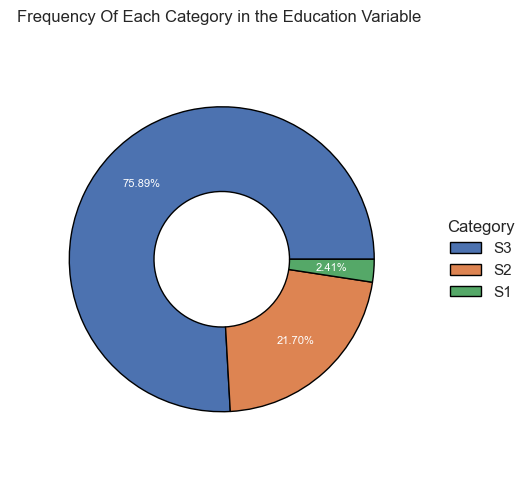

In [683]:
#CHANGING CATEGORY INTO "S1", "S2", and "S3" ONLY and create visualization

df['Education'] = df['Education'].replace(['PhD'], 'S3')
df['Education'] = df['Education'].replace(['2n Cycle','Graduation', 'Master'],'S2')  
df['Education'] = df['Education'].replace(['Basic'], 'S1')

labels = "S3","S2","S1"

print(df["Education"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

wedges, texts, autotexts = plt.pie([df["Education"].value_counts()[0],
                                    df["Education"].value_counts()[1],
                                    df["Education"].value_counts()[2]],
                                    explode = (0,0,0),
                                   textprops=dict(size= 8, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9,
                                    wedgeprops=dict(width = 0.5, edgecolor = "black"))

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")

plt.title("Frequency Of Each Category in the Education Variable \n",fontsize=12)

In [684]:
# see the number of unique value of "Marital_Status"

df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Relationship    64.5%
Single          35.5%
Name: Marital_Status, dtype: object


Text(0.5, 1.0, 'Frequency Of Each Category in the Marital Status Variable \n')

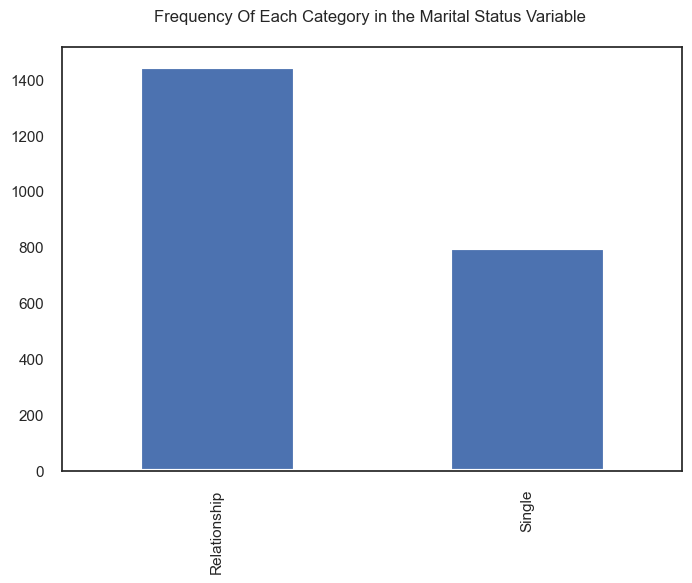

In [685]:
#CHANGING CATEGORY INTO "Relationship" and "Single" ONLY and create visualization

df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

print(df["Marital_Status"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

df['Marital_Status'].value_counts().plot(kind='bar',linewidth = 3)
plt.title("Frequency Of Each Category in the Marital Status Variable \n",fontsize=12)

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64


<Axes: >

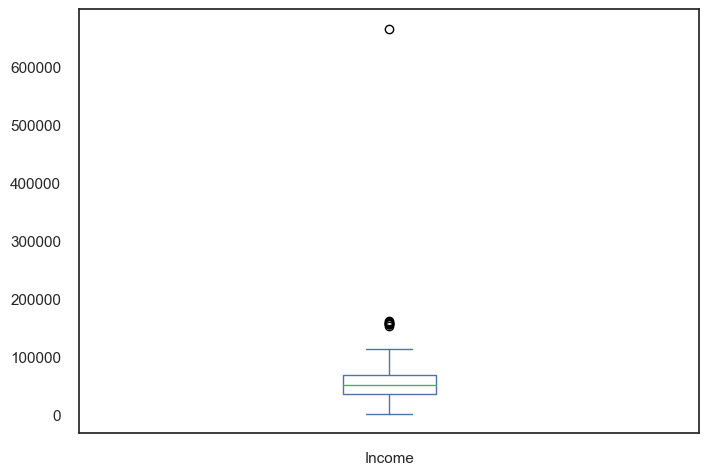

In [686]:
# explore income

print(df['Income'].describe())

df['Income'].plot.box()

1    50.4%
0    28.5%
2    18.8%
3     2.4%
Name: Kids, dtype: object


Text(0.5, 1.0, 'Frequency Of Each Category in the have kids Variable \n')

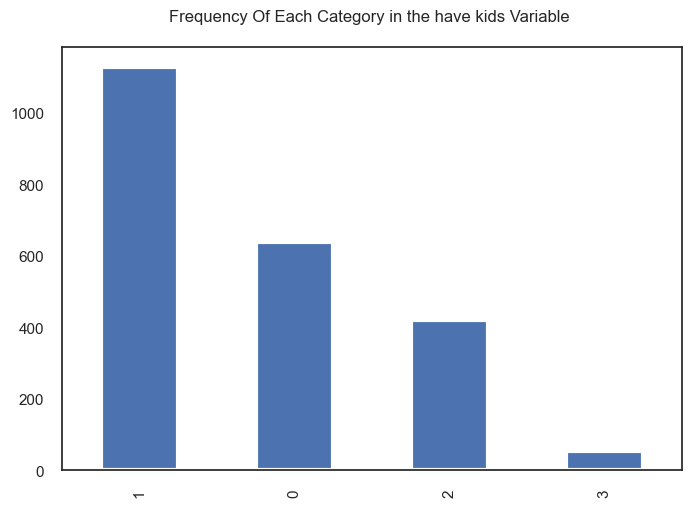

In [687]:
# preprocess and visual the kidhome and teenhome

df['Kids'] = df['Kidhome'] + df['Teenhome']

print(df["Kids"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

df['Kids'].value_counts().plot(kind='bar',linewidth = 3)
plt.title("Frequency Of Each Category in the have kids Variable \n",fontsize=12)

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: spent, dtype: float64


<Axes: >

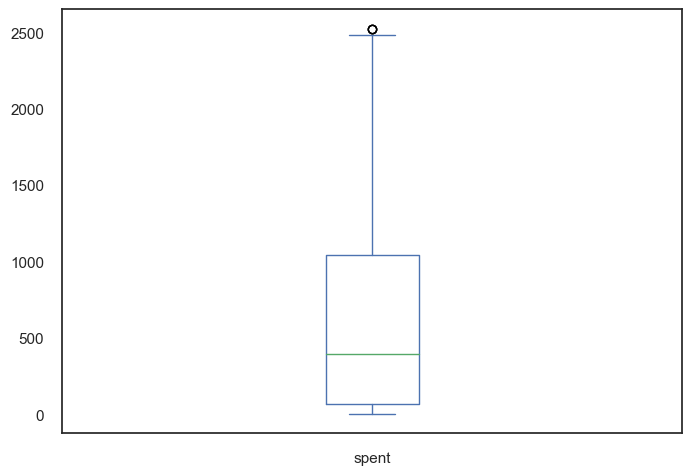

In [688]:
# explore spend

df['spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

print(df['spent'].describe())

df['spent'].plot.box()

0    79.3%
1    14.5%
2     3.7%
3     2.0%
4     0.5%
Name: TotalAcceptedCmp, dtype: object


Text(0.5, 1.0, 'Frequency Of Each Category in the have kids Variable \n')

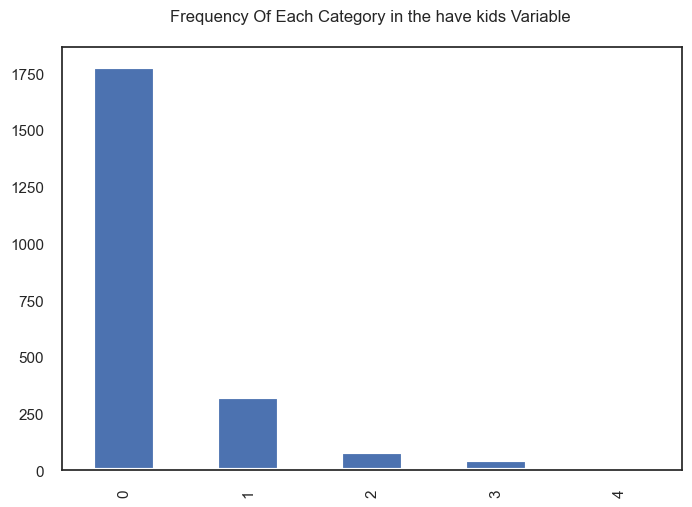

In [689]:
# preprocess and visual customer accepted the offer in the 1st campaign


df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

print(df["TotalAcceptedCmp"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

df['TotalAcceptedCmp'].value_counts().plot(kind='bar',linewidth = 3)
plt.title("Frequency Of Each Category in the have kids Variable \n",fontsize=12)

count    2240.000000
mean      512.043304
std       232.229893
min         0.000000
25%       340.750000
50%       513.000000
75%       685.250000
max      1063.000000
Name: Customer Loyalty, dtype: float64


<Axes: >

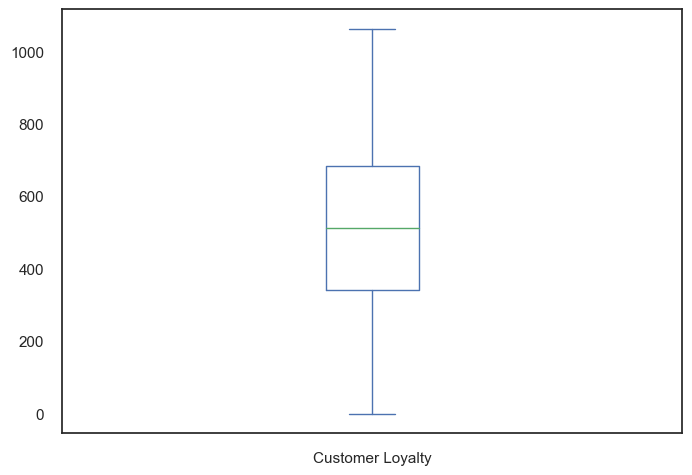

In [690]:
# preprocess customer loyalty in the company

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

days = []
newest = max(dates) 
for i in dates:
    duration = newest - i
    days.append(duration)
df["Customer Loyalty"] = days
df["Customer Loyalty"] = df["Customer Loyalty"].dt.days

print(df['Customer Loyalty'].describe())

df['Customer Loyalty'].plot.box()

Newest customer's enrolment Year is 2014
count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64


<Axes: >

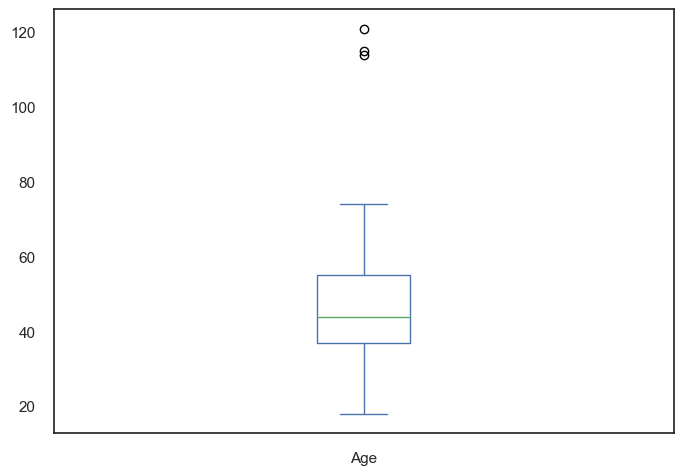

In [691]:
# Preprocessing age based on the customer oldest enrolment year 
print(f"Newest customer's enrolment Year is {max(dates).year}")

df["Age"] = max(dates).year - df["Year_Birth"]

print(df['Age'].describe())

df['Age'].plot.box()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64


<Axes: >

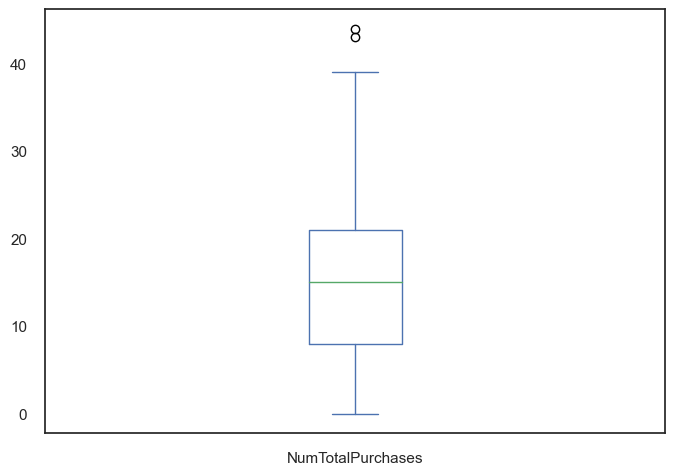

In [692]:
# Preprocessing type of purchases made

df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

print(df['NumTotalPurchases'].describe())

df['NumTotalPurchases'].plot.box()

In [693]:
# we would like to remove the outlier of the data for our segmentatin model

df.to_csv("unclean_data.csv")
df = df[df["Age"] < 90]
df = df[df["Income"] < 600000]

id_cust = df["ID"]
df = df[["Age","Education","Marital_Status","Income","Kids","spent","Customer Loyalty",
         "Recency","NumTotalPurchases","TotalAcceptedCmp","NumWebVisitsMonth"]]

df.describe()

,Age,Income,Kids,spent,Customer Loyalty,Recency,NumTotalPurchases,TotalAcceptedCmp,NumWebVisitsMonth
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,45.101968,51952.614043,0.950805,605.986583,512.179785,49.116279,14.872540,0.297853,5.318873
std,11.703281,21411.466851,0.752204,601.865156,232.311073,28.957284,7.677874,0.678737,2.426886
min,18.000000,1730.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,35502.500000,0.000000,69.000000,340.750000,24.000000,8.000000,0.000000,3.000000
50%,44.000000,51381.500000,1.000000,396.500000,513.000000,49.000000,15.000000,0.000000,6.000000
75%,55.000000,68275.750000,1.000000,1045.500000,686.000000,74.000000,21.000000,0.000000,7.000000
max,74.000000,162397.000000,3.000000,2525.000000,1063.000000,99.000000,44.000000,4.000000,20.000000


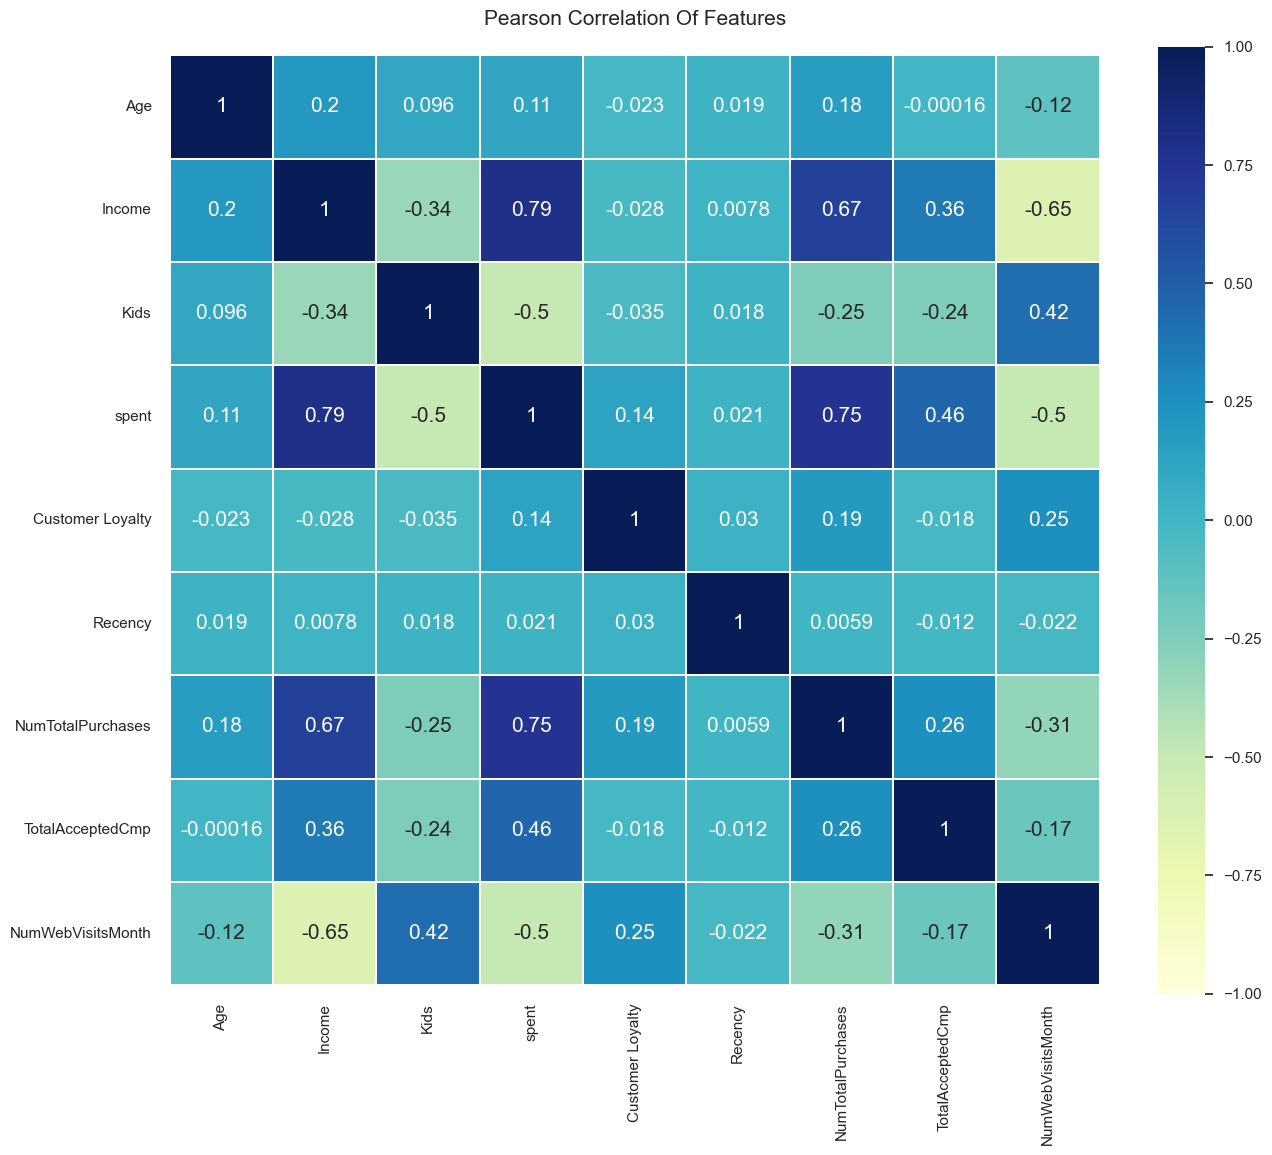

In [694]:
# plotting correlation heatmap
plt.subplots(figsize =(15, 15))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, square=True, 
                       cbar_kws=dict(shrink =.82), vmin=-1, vmax=1, 
                       linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =15))
  
# displaying heatmap
plt.title("Pearson Correlation Of Features\n", fontsize=15)
plt.show()

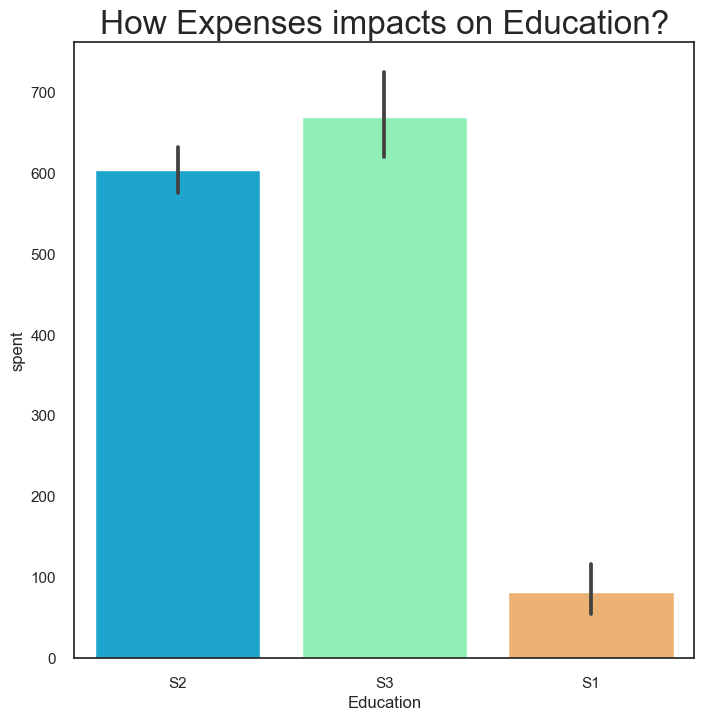

In [695]:
# since we want to see the type of customer we will try to explore the relationship of spent

sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Expenses impacts on Education?",fontsize=24)
ax = sns.barplot(x="Education", y="spent", data=df,palette="rainbow")

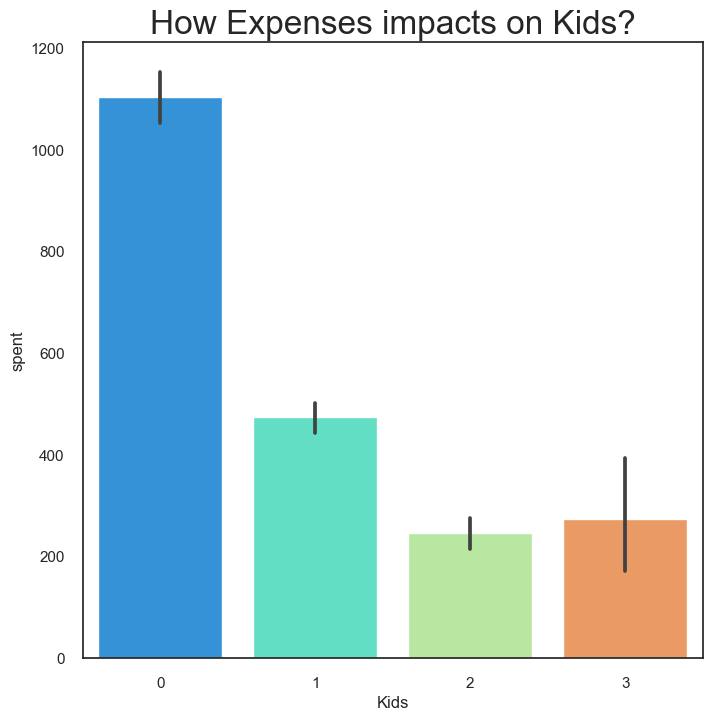

In [696]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Expenses impacts on Kids?",fontsize=24)
ax = sns.barplot(x="Kids", y="spent", data=df,palette="rainbow")

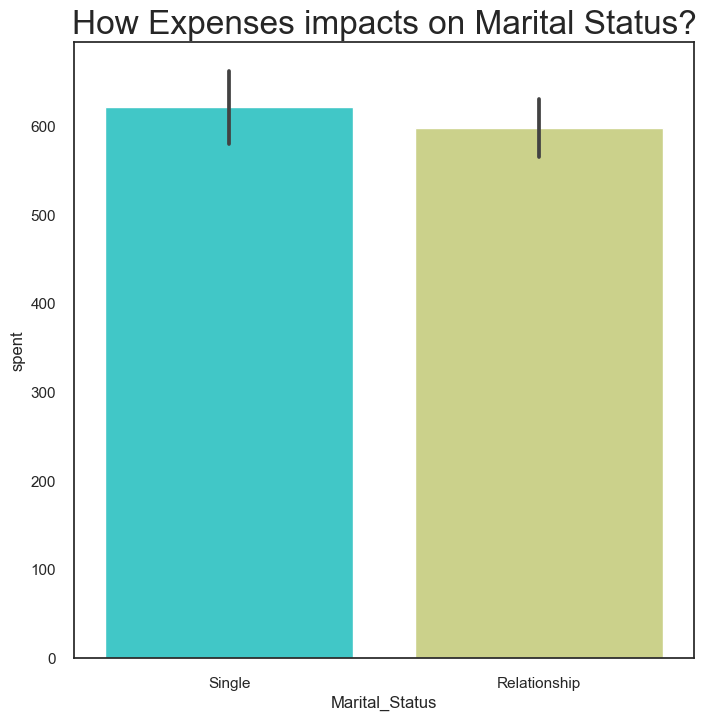

In [697]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Expenses impacts on Marital Status?",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="spent", data=df,palette="rainbow")

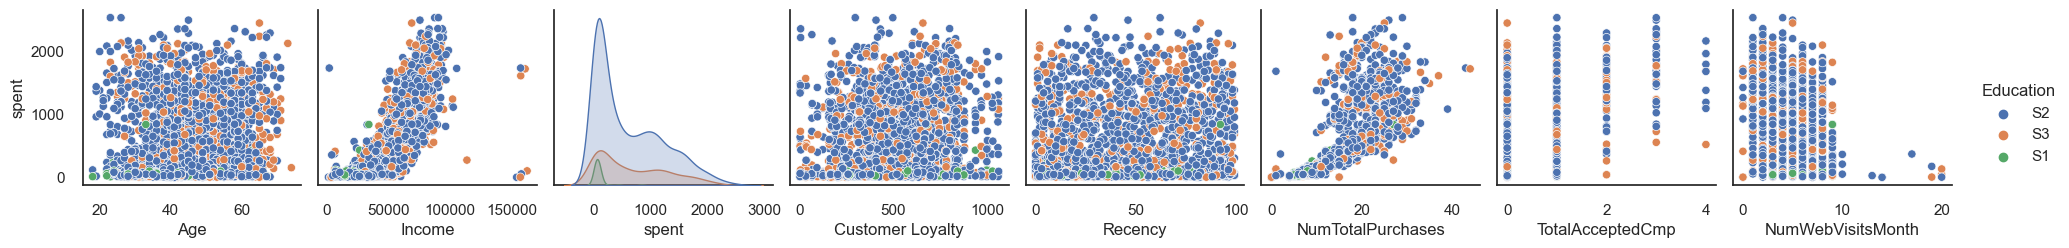

In [698]:
sns.pairplot(df,x_vars=["Age","Income","spent","Customer Loyalty",
         "Recency","NumTotalPurchases","TotalAcceptedCmp","NumWebVisitsMonth"],
    y_vars=["spent"],hue="Education")

In [699]:
df.dtypes

Age                    int64
Education             object
Marital_Status        object
Income               float64
Kids                   int64
spent                  int64
Customer Loyalty       int64
Recency                int64
NumTotalPurchases      int64
TotalAcceptedCmp       int64
NumWebVisitsMonth      int64
dtype: object

In [700]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(" Object are:",cate)

Int = []
for i in df.columns:
    if (df[i].dtypes == "int64"):
        Int.append(i)

print(" Integers are:",Int)

Float = []
for i in df.columns:
    if (df[i].dtypes == "float64"):
        Float.append(i)

print("Float are:",Float)

 Object are: ['Education', 'Marital_Status']
 Integers are: ['Age', 'Kids', 'spent', 'Customer Loyalty', 'Recency', 'NumTotalPurchases', 'TotalAcceptedCmp', 'NumWebVisitsMonth']
Float are: ['Income']


In [701]:
from sklearn.preprocessing import LabelEncoder
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)
    
df1 = df.copy()

In [702]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df1.values)
sf_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [703]:
sf_df.head()

,Age,Education,Marital_Status,Income,Kids,spent,Customer Loyalty,Recency,NumTotalPurchases,TotalAcceptedCmp,NumWebVisitsMonth
0,1.016868,-0.426870,1.347635,0.288947,-1.264308,1.680176,1.975467,0.306856,1.319340,-0.438933,0.692865
1,1.273264,-0.426870,1.347635,-0.262003,1.395139,-0.962202,-1.667017,-0.383971,-1.155857,-0.438933,-0.131421
2,0.333146,-0.426870,-0.742041,0.918423,-1.264308,0.282541,-0.172996,-0.798467,0.798246,-0.438933,-0.543564
3,-1.290693,-0.426870,-0.742041,-1.182183,0.065416,-0.918994,-1.925349,-0.798467,-0.895310,-0.438933,0.280722
4,-1.034298,1.787704,-0.742041,0.296187,0.065416,-0.305762,-0.823131,1.550344,0.537699,-0.438933,-0.131421


In [704]:
X = sf_df.iloc[:, [7, 3]].values
print(X)

[[ 0.30685572  0.28894655]
 [-0.38397129 -0.262003  ]
 [-0.7984675   0.91842301]
 ...
 [ 1.44672029  0.234898  ]
 [-1.42021181  0.80780332]
 [-0.31488859  0.04280841]]


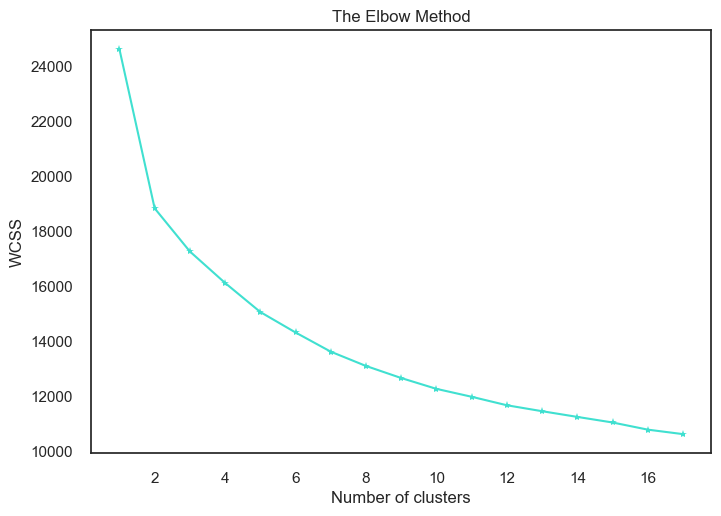

In [705]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(sf_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 18), wcss,color = "turquoise",marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

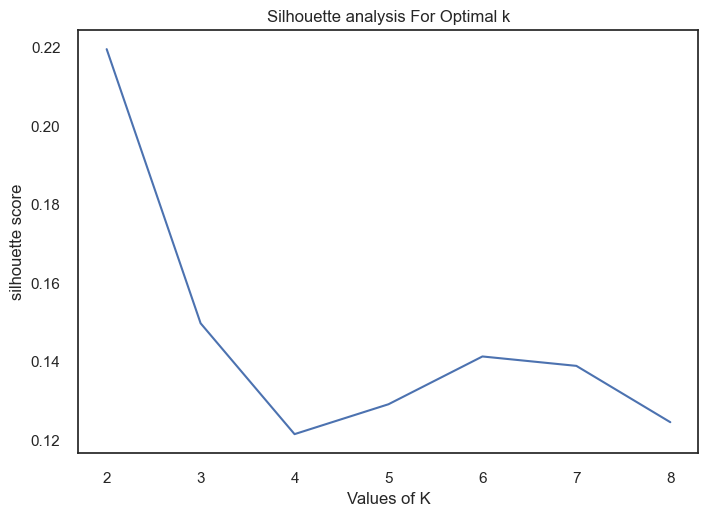

In [706]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(sf_df)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg.append(silhouette_score(sf_df, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [707]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters =2 , init = 'k-means++', random_state = 50)
y_kmeans = kmeans.fit_predict(sf_df)

In [708]:
df["customer category"] = y_kmeans

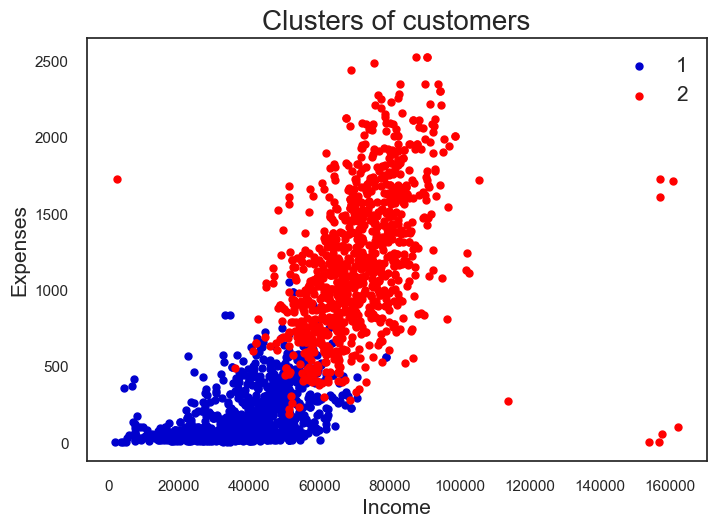

In [709]:
cat_1_income = df["Income"][df["customer category"] == 0]
cat_2_income = df["Income"][df["customer category"] == 1]


cat_1_spent = df["spent"][df["customer category"] == 0]
cat_2_spent = df["spent"][df["customer category"] == 1]

plt.scatter(cat_1_income, cat_1_spent, s = 25,c = 'mediumblue', label ="1")
plt.scatter(cat_2_income, cat_2_spent, s = 25,c = 'red', label ="2")

plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [710]:
df["Marital_Status"].replace({0:"Relationship", 1:"Single"}, inplace = True)
df["Education"].replace({0:"S1",1:"S2", 2:"S3"}, inplace = True)

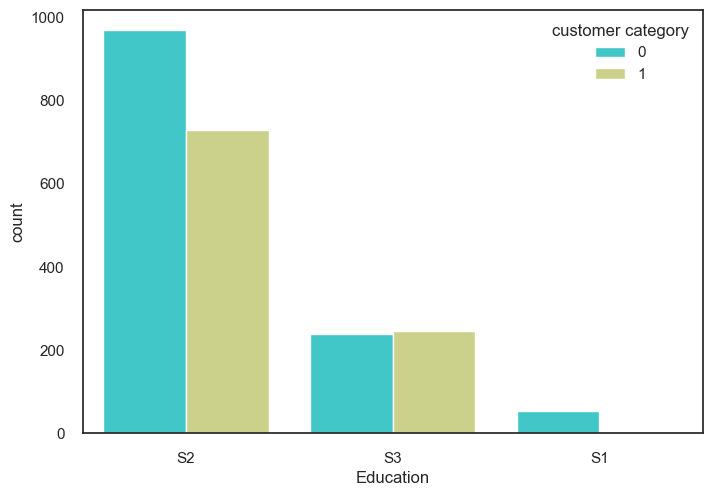

In [711]:
ax = sns.countplot(x=df["Education"],hue=df["customer category"],palette="rainbow")

In [712]:
# Calculating RFM Metrics

rfm = pd.DataFrame()

rfm["customer_id"] = id_cust
rfm["recency"] = df["Recency"]
rfm["frequency"] = df["NumTotalPurchases"]
rfm["monetary"] = df["spent"]

In [713]:
# recency_score, frequency_score, monetary_score

r_labels = range(4, 0, -1); 
f_labels = range(1, 5)
m_labels = range(1, 5)

# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(rfm['recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(rfm['frequency'], q=4, labels=f_labels)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(rfm['monetary'], q=4, labels=m_labels)

rfm["recency_score"] = r_groups.values
rfm["frequency_score"] = f_groups.values
rfm["monetary_score"] = m_groups.values

In [714]:
rfm['RFM_Score'] = rfm[['recency_score','frequency_score','monetary_score']].sum(axis=1)

In [715]:
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_Score,RFM_Level
0,5524,58,25,1617,2,4,4,10,Can't Loose Them
1,2174,38,6,27,3,1,1,5,Promising
2,4141,26,21,776,3,3,3,9,Can't Loose Them
3,6182,26,8,53,3,1,1,5,Promising
4,5324,94,19,422,1,3,3,7,Loyal


<Axes: ylabel='RFM_Level'>

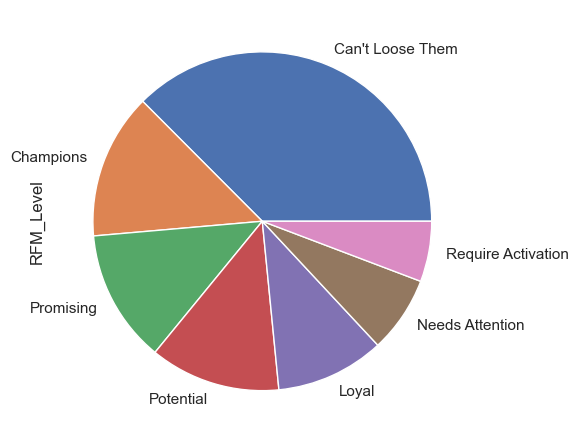

In [716]:
rfm["RFM_Level"].value_counts().plot.pie()

In [717]:
df["customer_id"] = id_cust

In [718]:
df.to_csv("new_data.csv")

In [719]:
rfm.to_csv("rfm.csv")